<a href="https://colab.research.google.com/github/Tamoziit/Data-Mining/blob/main/DB_Scan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**DB-Scan Algorithm**

In [8]:
class DBSCAN:
    def __init__(self, eps=0.5, min_pts=4):
        self.eps = eps
        self.min_pts = min_pts
        self.labels = None
        self.visited = None
        self.cluster_id = 0

    def fit(self, X):
        n = len(X)
        self.labels = np.full(n, -1)  # -1 = noise
        self.visited = np.zeros(n, dtype=bool)

        # Computing distance matrix
        self.dist_matrix = self.compute_distance_matrix(X)

        # Cluster formation
        for i in range(n):
            if not self.visited[i]:
                self.visited[i] = True
                neighbors = self.region_query(i)

                if len(neighbors) < self.min_pts:
                    self.labels[i] = -1  # Noise
                else:
                    print(f"Forming cluster {self.cluster_id}")
                    self.expand_cluster(i, neighbors)
                    self.cluster_id += 1

    def compute_distance_matrix(self, X):
        n = len(X)
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                dist_matrix[i][j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))

        print(dist_matrix)
        return dist_matrix

    # Returns all points within eps distance (neighbors)
    def region_query(self, point_idx):
        return [i for i in range(len(self.dist_matrix)) if self.dist_matrix[point_idx][i] <= self.eps]

    # Recursive function to recursively expand a cluster.
    def expand_cluster(self, point_idx, neighbors):
        self.labels[point_idx] = self.cluster_id
        for neighbor_idx in neighbors:
            if not self.visited[neighbor_idx]:
                self.visited[neighbor_idx] = True
                neighbor_neighbors = self.region_query(neighbor_idx)

                # Recursive expansion if it’s a core point
                if len(neighbor_neighbors) >= self.min_pts:
                    self.expand_cluster(neighbor_idx, neighbor_neighbors)

            # Adding to cluster if not already assigned
            if self.labels[neighbor_idx] == -1:
                self.labels[neighbor_idx] = self.cluster_id

*Dataset - 1*

In [4]:
df = pd.read_csv("/content/Dataset_1 - Dataset_1.csv")
X = df[['x1', 'x2']].values

In [13]:
dbscan = DBSCAN(eps=0.5, min_pts=4)
dbscan.fit(X)

[[ 0.          4.3300267   2.33798999 ...  7.15786738 10.08494127
   8.28329449]
 [ 4.3300267   0.          4.24923405 ...  4.89896637  8.99590081
   5.73561906]
 [ 2.33798999  4.24923405  0.         ...  8.39814384 11.86325226
   9.44165416]
 ...
 [ 7.15786738  4.89896637  8.39814384 ...  0.          4.25862658
   1.1436117 ]
 [10.08494127  8.99590081 11.86325226 ...  4.25862658  0.
   3.99379678]
 [ 8.28329449  5.73561906  9.44165416 ...  1.1436117   3.99379678
   0.        ]]
Forming cluster 0
Forming cluster 1
Forming cluster 2
Forming cluster 3
Forming cluster 4
Forming cluster 5
Forming cluster 6
Forming cluster 7
Forming cluster 8
Forming cluster 9
Forming cluster 10
Forming cluster 11
Forming cluster 12
Forming cluster 13
Forming cluster 14
Forming cluster 15


In [14]:
df['cluster'] = dbscan.labels
print(df.head())

   Unnamed: 0        x1        x2  y  cluster
0           0  4.475986  1.610147  1       -1
1           1  0.309710  2.789669  1        0
2           2  4.398344  3.946847  1       -1
3           3 -0.660853  2.801566  1        0
4           4  4.044945  4.343379  1       -1


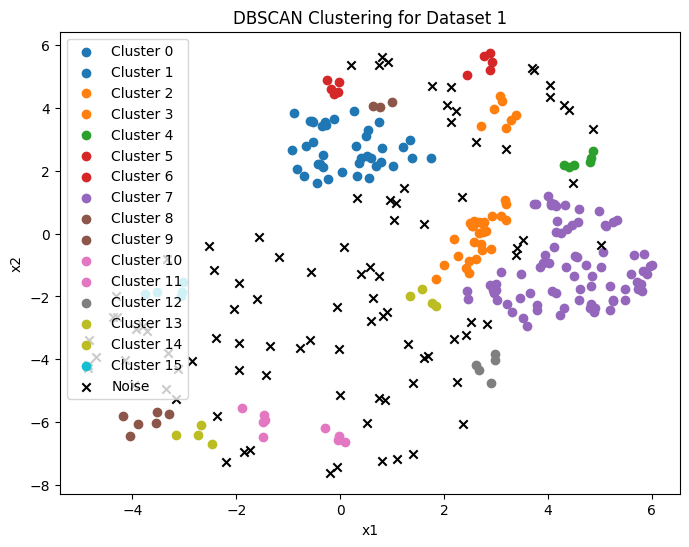

In [15]:
plt.figure(figsize=(8, 6))
unique_clusters = set(dbscan.labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster_id, color in zip(unique_clusters, colors):
    cluster_points = X[df['cluster'] == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='k', label='Noise', marker='x')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {cluster_id}')

plt.title("DBSCAN Clustering for Dataset 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

*Dataset - 2*

In [16]:
df = pd.read_csv("/content/Dataset_2 - Dataset_2.csv")
X = df[['x1', 'x2']].values

In [17]:
dbscan = DBSCAN(eps=0.6, min_pts=6)
dbscan.fit(X)

[[0.         2.02746358 1.59371715 ... 3.9855699  4.24610925 4.54195958]
 [2.02746358 0.         2.4770447  ... 2.95807527 5.62289911 6.12763719]
 [1.59371715 2.4770447  0.         ... 2.93690823 3.14629497 3.68797385]
 ...
 [3.9855699  2.95807527 2.93690823 ... 0.         5.15572587 5.94537909]
 [4.24610925 5.62289911 3.14629497 ... 5.15572587 0.         0.86826263]
 [4.54195958 6.12763719 3.68797385 ... 5.94537909 0.86826263 0.        ]]
Forming cluster 0
Forming cluster 1
Forming cluster 2
Forming cluster 3
Forming cluster 4
Forming cluster 5
Forming cluster 6


In [18]:
df['cluster'] = dbscan.labels
print(df.head())

   Unnamed: 0        x1        x2  y  cluster
0           0  0.004419 -0.321069  1        0
1           1  0.142936  1.701657  1        0
2           2 -1.571848 -0.085874  1        0
3           3  0.666752 -0.240567  1        0
4           4  0.690767  1.058377  1        0


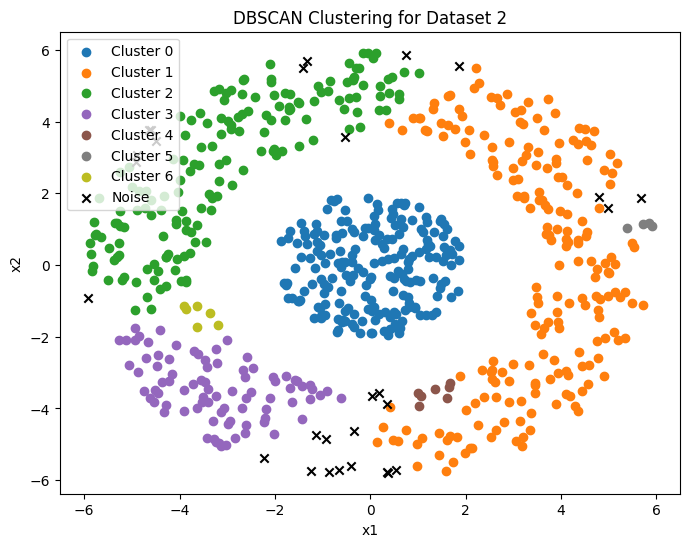

In [19]:
plt.figure(figsize=(8, 6))
unique_clusters = set(dbscan.labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster_id, color in zip(unique_clusters, colors):
    cluster_points = X[df['cluster'] == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='k', label='Noise', marker='x')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {cluster_id}')

plt.title("DBSCAN Clustering for Dataset 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [20]:
!pip install pypandoc

In [21]:
!apt-get install -y pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [23]:
import pypandoc
pypandoc.convert_file("DB_Scan_Clustering.ipynb", "docx", outputfile="DB_Scan_Clustering.docx")

''